In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import configparser
from google.colab import drive
drive.mount('/content/gdrive')
pathconf = '/content/gdrive/My Drive/Visualization/parameter.conf'
path = '/content/gdrive/My Drive/Visualization/Data/'
path_img = '/content/gdrive/My Drive/Visualization/Images/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


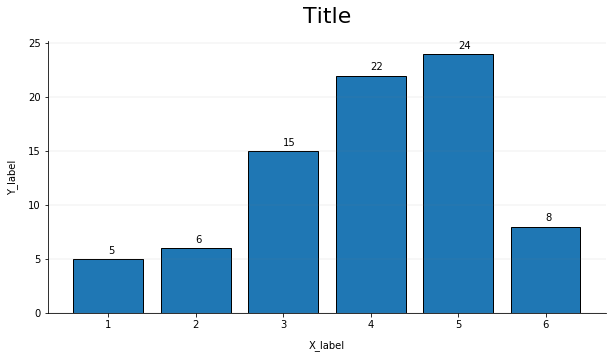

In [9]:
# loading and preparing data
cf = configparser.ConfigParser()
cf.read(pathconf)
df1 = pd.DataFrame({'X':['1', '2', '3', '4', '5', '6'],
                    'Y': [5, 6, 15, 22, 24, 8]})

# font setting
font = {'fontsize': cf['font']['fontsize'],
        'fontweight' : cf['font']['fontweight'],
        'family' : cf['font']['family'],   # font family, default is DejaVu Sans
        'verticalalignment' : cf['font']['verticalalignment'],   # 'top', 'bottom', 'center', 'baseline'
        'horizontalalignment' : cf['font']['horizontalalignment']  # 'center', 'right', 'left'
       }

# plot size setting
FigSize = tuple([float(i) for i in cf['DEFAULT']['figsize'][1:-1].split(",")])

# drawing plot
fig, ax = plt.subplots(figsize=FigSize)
plt.bar('X', 'Y', data = df1, edgecolor=cf['bar']['edge_color'])

# title and size
ax.set_title('Title',fontsize=22,pad = 18)

# x,y label and size
# labelpad: Spacing in points between the label and the x-axis.
plt.xlabel('X_label', labelpad=float(cf['label']['labelpad']))
plt.ylabel('Y_label', labelpad=float(cf['label']['labelpad']))

# top and right borders removing
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# background grid setting
ax.yaxis.grid(color =cf['grid']['color'] , linewidth=float(cf['grid']['linewidth']), alpha=float(cf['grid']['alpha'])) # alpha: soft color

# present number on graph
for x, v in enumerate(list(df1['X'].values)):
    plt.text(x, df1['Y'].values.tolist()[x]+0.5, str(df1['Y'].values.tolist()[x]), color='black')

# save image as pdf to path folder
# bbox in inches, only the given portion of the figure is saved, figure out the tight bbox of the figure
plt.savefig(path_img+'bar.pdf', bbox_inches='tight')
# showing the image
plt.show()

# group data

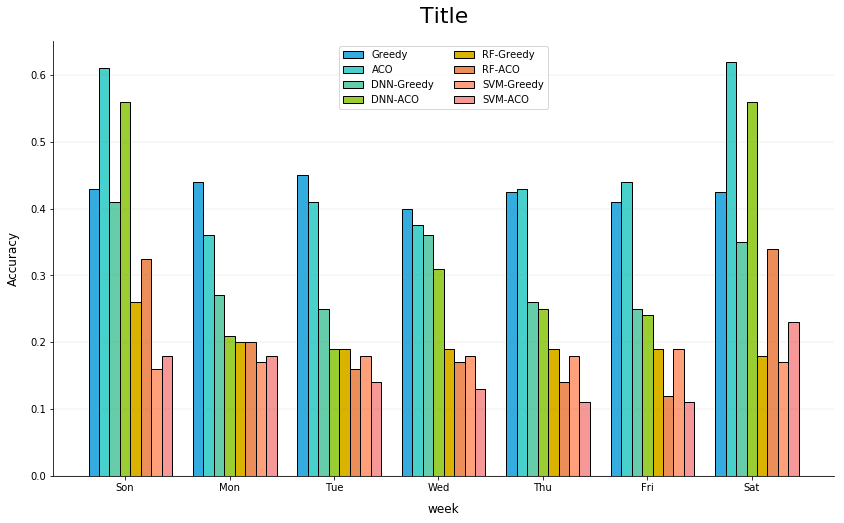

In [8]:
# loading and preparing data
df2 = pd.DataFrame({'week':["Son","Mon","Tue","Wed","Thu","Fri","Sat"],
                'Greedy':[0.43, 0.44, 0.45, 0.4, 0.425, 0.41,0.425],
                'ACO' :[0.61, 0.36, 0.41, 0.375, 0.43, 0.44, 0.62],
                'DNN-Greedy':[0.41, 0.27, 0.25, 0.36, 0.26, 0.25, 0.35],
                'DNN-ACO':[0.56, 0.21, 0.19, 0.31, 0.25, 0.24, 0.56],
                'RF-Greedy':[0.26, 0.2, 0.19, 0.19, 0.19, 0.19, 0.18],
                'RF-ACO':[0.325, 0.2, 0.16, 0.17, 0.14, 0.12, 0.34],
                'SVM-Greedy':[0.16, 0.17, 0.18, 0.18, 0.18, 0.19, 0.17],
                'SVM-ACO':[0.18, 0.18, 0.14, 0.13, 0.11, 0.11, 0.23]})

# color labels setting
color = ['#35ACDF','mediumturquoise','mediumaquamarine','yellowgreen','#D9B300','#EB8E59','lightsalmon','#F69898']
edge_color = cf['bar']['edge_color']

# font setting
font = {'fontsize': cf['font']['fontsize'],
        'fontweight' : cf['font']['fontweight'],
        'family' : cf['font']['family'],
        'verticalalignment' : cf['font']['verticalalignment'],
        'horizontalalignment' : cf['font']['horizontalalignment']
       }
# barwidth setting
barWidth = float(cf['bar']['bar_width'])

# location of bar on x axis setting
r1 = np.arange(len(df2['week'].values.tolist()))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]

# plot size setting
grouped_FigSize = tuple([float(i) for i in cf['bar']['figsize'][1:-1].split(",")])

# drawing plot
fig, ax = plt.subplots(figsize=grouped_FigSize)
# drawing bars
plt.bar(r1, df2['Greedy'].values.tolist(), color=color[0], width=barWidth, edgecolor=cf['bar']['edge_color'] , label='Greedy')
plt.bar(r2, df2['ACO'].values.tolist(), color=color[1], width=barWidth, edgecolor=cf['bar']['edge_color'], label='ACO')
plt.bar(r3, df2['DNN-Greedy'].values.tolist(), color=color[2], width=barWidth, edgecolor=cf['bar']['edge_color'], label='DNN-Greedy')
plt.bar(r4, df2['DNN-ACO'].values.tolist(), color=color[3], width=barWidth, edgecolor=cf['bar']['edge_color'], label='DNN-ACO')
plt.bar(r5, df2['RF-Greedy'].values.tolist(), color=color[4], width=barWidth, edgecolor=cf['bar']['edge_color'], label='RF-Greedy')
plt.bar(r6, df2['RF-ACO'].values.tolist(), color=color[5], width=barWidth, edgecolor=cf['bar']['edge_color'], label='RF-ACO')
plt.bar(r7, df2['SVM-Greedy'].values.tolist(), color=color[6], width=barWidth, edgecolor=cf['bar']['edge_color'], label='SVM-Greedy')
plt.bar(r8, df2['SVM-ACO'].values.tolist(), color=color[7], width=barWidth, edgecolor=cf['bar']['edge_color'], label='SVM-ACO')

# title and size
ax.set_title('Title',fontsize=22,pad = 18)

# x,y label and size
# labelpad: Spacing in points between the label and the x-axis
plt.xlabel('week', fontsize = float(cf['label']['fontsize']), labelpad=float(cf['label']['labelpad']))
plt.ylabel('Accuracy', fontsize = float(cf['label']['fontsize']), labelpad=float(cf['label']['labelpad']))

# location of xticks label adjusting
plt.xticks([x + 0.2 + barWidth for x in range(len(df2['week'].values.tolist()))], df2['week'].values.tolist())

# top and right borders removing
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# background grid setting
ax.yaxis.grid(color =cf['grid']['color'] , linewidth=float(cf['grid']['linewidth']), alpha=float(cf['grid']['alpha'])) # alpha: soft color

# legend
plt.legend(ncol=int(cf['legend']['ncol']))

# save image as pdf to path folder
# bbox in inches, only the given portion of the figure is saved, figure out the tight bbox of the figure
plt.savefig(path_img+'bar_grouped.pdf', bbox_inches='tight')
# showing the image
plt.show()

# Error Bar

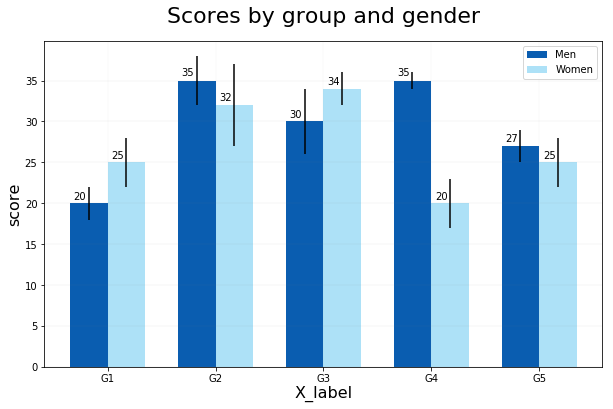

In [7]:
# loading and preparing data
df3 = pd.DataFrame({'men_means'  :[20, 35, 30, 35, 27],
                    'men_std'    :[2, 3, 4, 1, 2],
                    'women_means':[25, 32, 34, 20, 25],
                    'women_std'  :[3, 5, 2, 3, 3]})
# x locations for the groups
ind = np.arange(len(df3['men_means'].values.tolist()))  

# color labels setting
color = ['#0A5DB0','#ADE1F7','grey']

# width of the bars setting
width = 0.35

# plot size setting
fig, ax = plt.subplots(figsize=(10,6))

# drawing plot
rects1 = ax.bar(ind - width/2, df3['men_means'].values.tolist(), width, yerr=df3['men_std'].values.tolist(),
                color=color[0], label='Men')
rects2 = ax.bar(ind + width/2, df3['women_means'].values.tolist(), width, yerr=df3['women_std'].values.tolist(),
                color=color[1], label='Women')

# title and size
ax.set_title('Scores by group and gender',fontsize=22,pad = 18)

# x,y label and size
# labelpad: Spacing in points between the label and the x-axis
plt.xlabel('X_label', fontdict=font, labelpad=10)
plt.ylabel('score', fontdict=font, labelpad=10)

# ticks setting 
ax.set_xticks(ind)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))

# legend
ax.legend()

# background grid setting
ax.xaxis.grid(color=color[2], linewidth=0.1, alpha=0.4) # alpha: soft color
ax.yaxis.grid(color=color[2], linewidth=0.2, alpha=0.4) # alpha: soft color

# attach values label above each bar in *rects*, displaying its height
# *xpos* indicates which side to place the text w.r.t. the center of the bar
# it can be one of the following {'center', 'right', 'left'}.
def autolabel(rects, xpos='center'):
    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')
        
# position of bar values setting
autolabel(rects1, "left")
autolabel(rects2, "left")

# save image as pdf to path folder
# bbox in inches, only the given portion of the figure is saved, figure out the tight bbox of the figure
plt.savefig(path_img+'bar_error.pdf', bbox_inches='tight')
# showing the image
plt.show()

# stacked bar chart

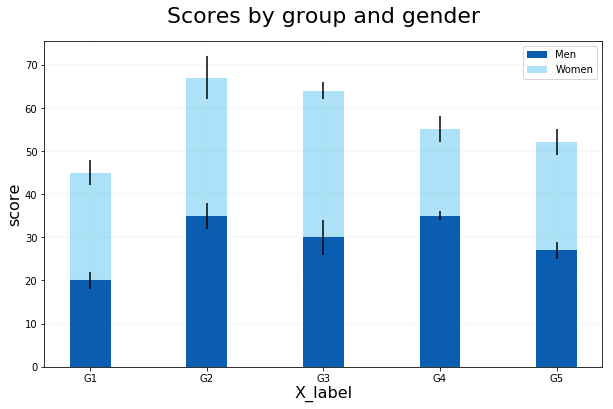

In [6]:
# loading and preparing data
df3 = pd.DataFrame({'men_means'  :[20, 35, 30, 35, 27],
                    'men_std'    :[2, 3, 4, 1, 2],
                    'women_means':[25, 32, 34, 20, 25],
                    'women_std'  :[3, 5, 2, 3, 3]})
# x locations for the groups setting
ind = np.arange(len(df3['men_means'].values.tolist())) 

# color labels setting 
color = ['#0A5DB0','#ADE1F7','grey']

#  width of the bars setting 
width = 0.35  

# plot size setting
fig, ax = plt.subplots(figsize=(10,6))

# drawing plot
rects1 = ax.bar(ind, df3['men_means'].values.tolist(), width, yerr=df3['men_std'].values.tolist(),
                color=color[0], label='Men')
rects2 = ax.bar(ind, df3['women_means'].values.tolist(), width, yerr=df3['women_std'].values.tolist(),
                bottom = df3['men_means'].values.tolist(), color=color[1], label='Women')

# title and size
ax.set_title('Scores by group and gender',fontsize=22,pad = 18)

# x,y label and size
# labelpad: Spacing in points between the label and the x-axis
plt.xlabel('X_label', fontdict=font, labelpad=10)
plt.ylabel('score', fontdict=font, labelpad=10)

# ticks setting
ax.set_xticks(ind)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))

# legend
ax.legend()

# background grid setting
ax.xaxis.grid(color=color[2], linewidth=0.1, alpha=0.4) # alpha: soft color
ax.yaxis.grid(color=color[2], linewidth=0.2, alpha=0.4) # alpha: soft color

# save image as pdf to path folder
# bbox in inches, only the given portion of the figure is saved, figure out the tight bbox of the figure
plt.savefig(path_img+'bar_stacked.pdf', bbox_inches='tight')
# showing the image
plt.show()